In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt

# set the CARMA model parameters
sigmay = 2.3  # dispersion in the time series
p = 5  # order of the AR polynomial
mu = 17.0  # mean of the time series
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0])  # widths of of Lorentzian components
qpo_cent = np.array([1.0/5.0, 1.0/25.0])  # centroids of Lorentzian components
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) # compute the roots r_k from the Lorentzian function parameters
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
# convert CARMA model variance to variance in the driving white noise
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)  # ca

Text(0,0.5,'Magnitud')

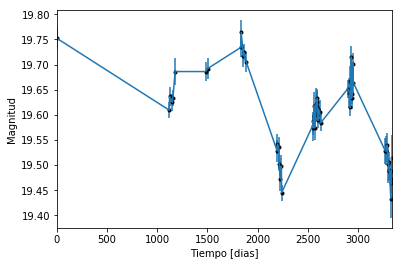

In [2]:
data = np.genfromtxt('LC_R_99669.dat')
juldate = data[:,0]  # time is given by the julian date
t = juldate - juldate.min()  # set first time value to zero for convenience. units of t are days.
y = data[:,1]  # i-band magnitudes
yerr = data[:,2]  # standard deviation in the measurement noise

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

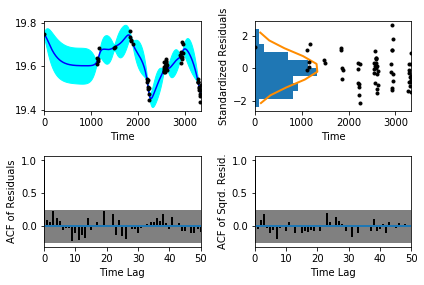

In [5]:
sample.assess_fit()

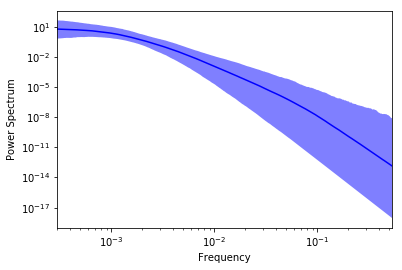

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

NameError: name 'noise_level' is not defined

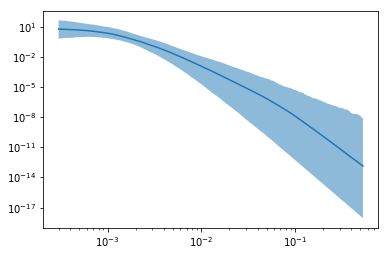

In [7]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia')
plt.xlabel('Frecuencia  [1 / dia]')
plt.annotate("Nivel de ruido", (1.25* plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

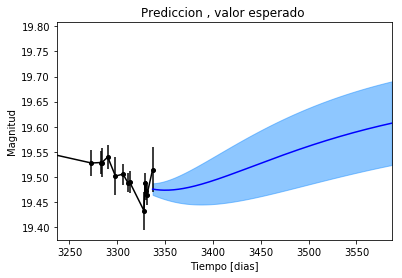

In [8]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

Text(0.5,1,'Prediccion, Caminos simulados')

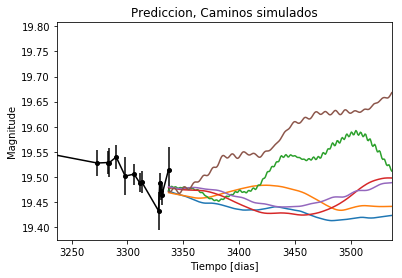

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 6
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  # use a random draw of the CARMA parameters from its posterior
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


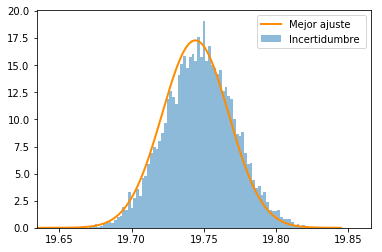

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

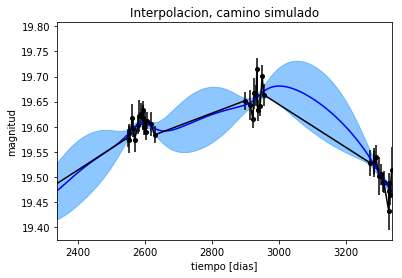

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

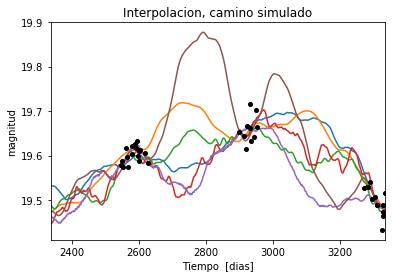

In [16]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 6
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [17]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [18]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 369.401070172
Median: 0.000702409414189
Standard deviation: 0.224862512662
68% credibility interval: [ 0.          0.22104716]
95% credibility interval: [ 0.          0.89219626]
99% credibility interval: [ 0.          1.01582658]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 369.401070172
Median: 0.000702409414189
Standard deviation: 0.224862512662
68% credibility interval: [ 0.          0.22104716]
95% credibility interval: [ 0.          0.89219626]
99% credibility interval: [ 0.          1.01582658]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1144.914657
Median: 0.0
Standard deviation: 0.000451216703824
68% 

Plotting parameter summary


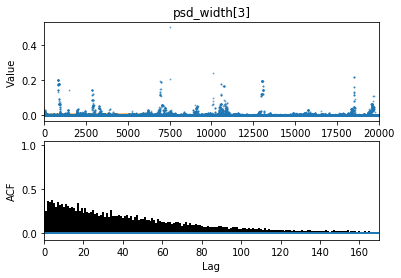

In [20]:
sample.plot_parameter('psd_width', 3, doShow=True)

In [21]:
centroid_samples = sample.get_samples('logpost')
centroid_samples.shape

(20000, 1)

In [22]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 950.203487385
Median: 155.562746921
Standard deviation: 1.60181235261
68% credibility interval: [ 153.71957659  156.71427966]
95% credibility interval: [ 151.33355957  157.3921874 ]
99% credibility interval: [ 149.29485465  157.62202325]


In [23]:
centroid_samples = sample.get_samples('ar_coefs')
centroid_samples.shape

(20000, 5)

In [24]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 568.95552621
Median: 0.563094297675
Standard deviation: 1.9801362396
68% credibility interval: [ 0.05558487  3.40785783]
95% credibility interval: [ 0.01434371  6.51253202]
99% credibility interval: [  9.58275345e-03   1.00123535e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 416.595974282
Median: 0.170130502108
Standard deviation: 8.09899921152
68% credibility interval: [ 0.00505141  4.19099704]
95% credibility interval: [  4.134

In [25]:
centroid_samples = sample.get_samples('ma_coefs')
centroid_samples.shape

(20000, 2)

In [26]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 63696.4664197
Median: 2.16117470755e-19
Standard deviation: 8.07306682557e+146
68% credibility interval: [  1.38147236e-60   2.20696394e-01]
95% credibility interval: [  1.00874098e-155   3.09024297e+113]
99% credibility interval: [  3.05202775e-161   1.08222950e+143]


In [27]:
centroid_samples = sample.get_samples('mu')
centroid_samples.shape

(20000, 1)

In [28]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2867.81923352
Median: 19.6259562733
Standard deviation: 0.0623068607493
68% credibility interval: [ 19.57641196  19.67577673]
95% credibility interval: [ 19.4944411  19.7453324]
99% credibility interval: [ 19.40622328  19.81624206]


In [29]:
centroid_samples = sample.get_samples('psd_centroid')
centroid_samples.shape

(20000, 4)

In [30]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 369.401070172
Median: 0.000702409414189
Standard deviation: 0.224862512662
68% credibility interval: [ 0.          0.22104716]
95% credibility interval: [ 0.          0.89219626]
99% credibility interval: [ 0.          1.01582658]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 369.401070172
Median: 0.000702409414189
Standard deviation: 0.224862512662
68% credibility interval: [ 0.          0.22104716]
95% credibility interval: [ 0.          0.89219626]
99% credibility interval: [ 0.          1.01582658]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1144.914657
Median: 0.0
Standard deviation: 0.000451216703824
68% 

In [31]:
centroid_samples = sample.get_samples('loglik')
centroid_samples.shape

(20000, 1)

In [32]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 950.203487385
Median: 155.562746921
Standard deviation: 1.60181235261
68% credibility interval: [ 153.71957659  156.71427966]
95% credibility interval: [ 151.33355957  157.3921874 ]
99% credibility interval: [ 149.29485465  157.62202325]


In [33]:
centroid_samples = sample.get_samples('psd_width')
centroid_samples.shape

(20000, 4)

In [34]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 864.5943695
Median: 0.0106075519144
Standard deviation: 0.190031750523
68% credibility interval: [ 0.00084523  0.16654734]
95% credibility interval: [  3.31776852e-04   7.48411319e-01]
99% credibility interval: [  3.04863554e-04   9.74397379e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 655.085088405
Median: 0.00128359954961
Standard deviation: 0.0816673237764
68% credibility interval: [ 0.00045596  0.01329543]
95% credibility interval: [ 0.0003213   0.20507236]
99% credibility interval: [  3.04742807e-04   6.97944803e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 318.671669393
Median: 0.0103570750692
Standard de

In [35]:
centroid_samples = sample.get_samples('var')
centroid_samples.shape

(20000, 1)

In [36]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1312.64434481
Median: 0.0144440740223
Standard deviation: 0.0209859716522
68% credibility interval: [ 0.00816712  0.02939299]
95% credibility interval: [ 0.00511417  0.07071068]
99% credibility interval: [ 0.00375331  0.13811052]


In [37]:
centroid_samples = sample.get_samples('measerr_scale')
centroid_samples.shape

(20000, 1)

In [38]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2208.84878169
Median: 0.948642086944
Standard deviation: 0.142638443075
68% credibility interval: [ 0.8170012   1.09401882]
95% credibility interval: [ 0.71591755  1.27206253]
99% credibility interval: [ 0.66208894  1.41143374]


In [39]:
centroid_samples = sample.get_samples('sigma')
centroid_samples.shape

(20000, 1)

In [40]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1906.17411073
Median: 2.49959859611e-05
Standard deviation: 0.00364143045778
68% credibility interval: [  1.58647101e-07   8.28686383e-04]
95% credibility interval: [  7.75247841e-119   7.40484541e-003]
99% credibility interval: [  1.98842106e-148   1.76832704e-002]


In [41]:
centroid_samples = sample.get_samples('ar_roots')
centroid_samples.shape

(20000, 4)

In [42]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 864.5943695
Median: (-0.0666492143336+0j)
Standard deviation: 1.84981089996
68% credibility interval: [-1.04644779-2.07298714j -0.00531074-0.8040723j ]
95% credibility interval: [ -4.70240700e+00+0.j          -2.08461544e-03-0.00269299j]
99% credibility interval: [ -6.12231930e+00+0.j          -1.91551420e-03-0.00693183j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 655.085088405
Median: (-0.00806509383043+0j)
Standard deviation: 1.50314885672
68% credibility interval: [-0.08353762 +5.98935244e+00j -0.00286487 +4.07480024e-03j]
95% credibility interval: [-1.28850763 +6.56203184e+00j -0.00201881 +4.79001679e-03j]
99% credibility interval: [ -4.38531653e+00+0.j          -1.91475553e-03+0.00676083j]
Posterior summary f

Plotting 2d PDF w KDE


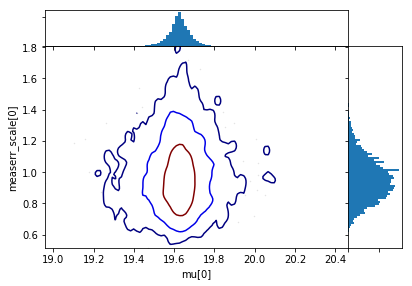

In [43]:
sample.plot_2dkde('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


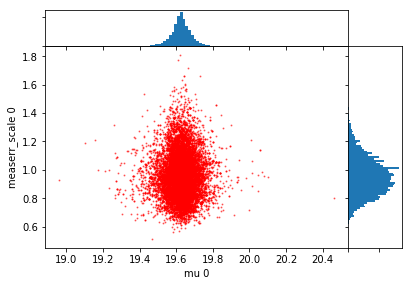

In [44]:
sample.plot_2dpdf('mu', 'measerr_scale', doShow=True)

Plotting 2d PDF


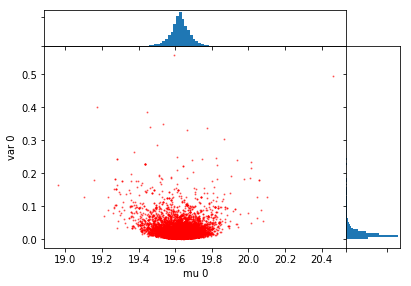

In [45]:
sample.plot_2dpdf('mu', 'var', doShow=True)

Plotting 2d PDF w KDE


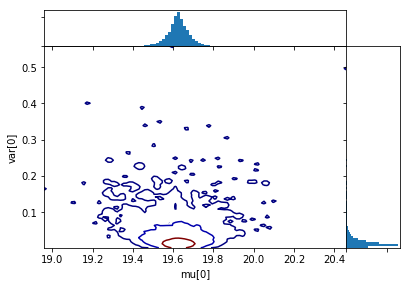

In [46]:
sample.plot_2dkde('mu', 'var', doShow=True)